# Random Forest Algorithm

Random Forest is a ```supervised learning algorithm```. like you can alreday see from it's name, it creates a forest and makes it somehow random. The forest it builds, is an ensemble of decision Trees, most of the time trained with the 'bagging' method. The general idea of the bagging method is that a combination of learning models increases the overall result.

To say it in simple words: Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

In [ ]:
# IMPORT  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [39]:
# load the data

df = sns.load_dataset('tips')

# encode features which are categorical or object using for loop
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype =='object' or df[col].dtype == 'category':
        df[col] = le.fit_transform(df[col])

# split the data into x and y for classification
x = df.drop("sex", axis=1)
y = df['sex']

# train test and split the data
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=42)

# crate and train the model
model = RandomForestClassifier(n_estimators=200, criterion= 'entropy', max_depth=100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# evaluate the model
print("accuracy: \n", accuracy_score(y_test, y_pred))
print("classification_report: \n", classification_report(y_test, y_pred))
print("confusion_matrix: ", confusion_matrix(y_test, y_pred))

accuracy: 
 0.5918367346938775
classification_report: 
               precision    recall  f1-score   support

           0       0.46      0.32      0.38        19
           1       0.64      0.77      0.70        30

    accuracy                           0.59        49
   macro avg       0.55      0.54      0.54        49
weighted avg       0.57      0.59      0.57        49

confusion_matrix:  [[ 6 13]
 [ 7 23]]


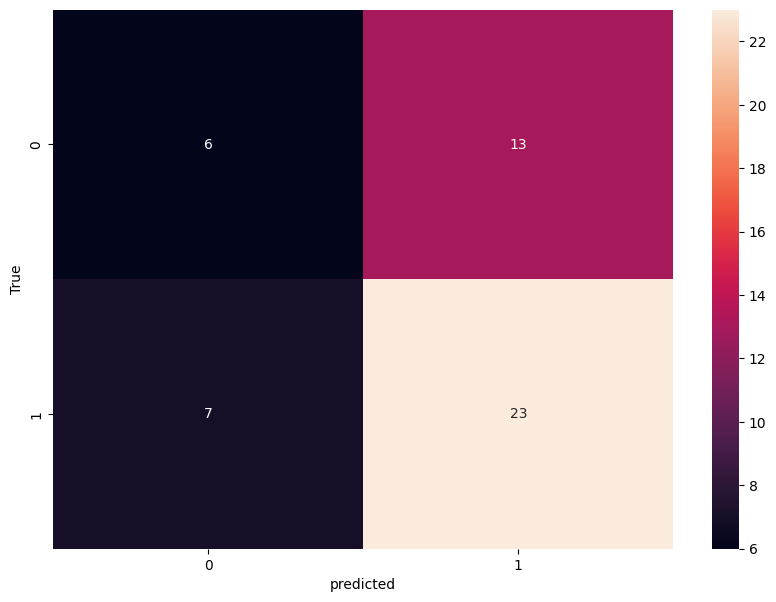

In [41]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred) , annot = True, fmt='d' )
plt.xlabel("predicted")
plt.ylabel("True")
plt.show()

#

# Random forest use for Regression

In [35]:
# load the data set from seaborn library
sns.load_dataset("tips")

#divide data into x and y
x = df.drop('tip', axis=1)
y = df['tip']

# split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# create and fit the model 
model = RandomForestRegressor()
# fit the model
model.fit(x_train, y_train)

# predict the model
y_pred = model.predict(x_test)

# evaluate the model
print("mean_squre eror: ", mean_squared_error(y_test, y_pred))
print("mean_absolute_error: ", mean_absolute_error(y_test, y_pred))
print("r2_score: ", r2_score(y_test, y_pred))
# print("accuaracy: ",accuracy_score(y_test, y_pred))


mean_squre eror:  0.9811822661224506
mean_absolute_error:  0.7825265306122452
r2_score:  0.21503619276303487
